In [1]:
import subprocess
import pandas as pd

from collections import Counter

In [2]:
upper_bound = 50
sample_size = 10000

In [3]:
cmd = ["./bin/pl", "--ub", str(upper_bound), "--size", str(sample_size)]
result = subprocess.run(cmd, shell=False, capture_output=True, text=True)
result_output = result.stdout
if "DEBUG" in result_output:
    raise Exception("Error: you should compile the code in Release mode")
sample_ls = eval(result_output)

<Axes: xlabel='support'>

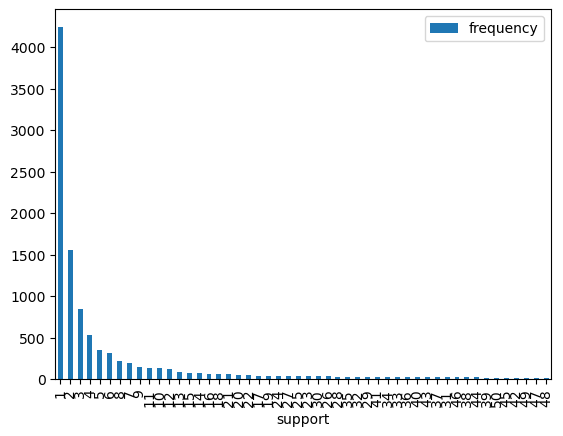

In [4]:
count = Counter(sample_ls)
df = pd.DataFrame.from_dict(count, orient='index').reset_index().rename(columns = {"index":"support", 0:"frequency"}).sort_values("frequency",ascending=False)
df.plot(x="support",y="frequency",kind='bar')